<a href="https://colab.research.google.com/github/slrico/Log-clickstream-Analysis/blob/main/OnlineShoppersPurchasingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p> Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.</p>

In [1]:
%%capture
!pip install ucimlrepo

# Understanding the Online Shop Purchases Dataset

This dataset contains information about user sessions on an online shopping platform. It includes various features describing each session, such as the number of page views, duration of the visit, and browsing behavior. The goal of the dataset is to predict whether a user will make a purchase during their visit.

**Key points about the data:**

- **Features:** Details about each session, like pages viewed, time spent, and browsing patterns.
- **Target:** A label indicating if the user ended up making a purchase (`True`) or left without buying (`False`).

This dataset helps analyze shopping behavior and build models to predict purchasing intentions, improving online marketing strategies.

---


In [2]:
from ucimlrepo import fetch_ucirepo
import pprint


online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

print("Dataset Metadata (First 3 items):")
for item in list(online_shoppers_purchasing_intention_dataset.metadata.items())[:3]:
    pprint.pprint(item, indent=4)

print("\nVariable Information (First 3 variables):")
for var in online_shoppers_purchasing_intention_dataset.variables[:3]:
    pprint.pprint(var, indent=4)

print("\nFull feature dataset (first 20 rows):")
print(X.head(20).to_string())
print("\nFirst 20 targets:")
print(y.head(20).to_string())


Dataset Metadata (First 3 items):
('uci_id', 468)
('name', 'Online Shoppers Purchasing Intention Dataset')
(   'repository_url',
    'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset')

Variable Information (First 3 variables):
'name'
'role'
'type'
'demographic'
'description'
'units'
'missing_values'

Full feature dataset (first 20 rows):
    Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  Browser  Region  TrafficType        VisitorType  Weekend
0                0                      0.0              0                     0.0               1                 0.000000     0.200000   0.200000         0.0         0.0   Feb                 1        1       1            1  Returning_Visitor    False
1                0                      0.0              0                     0.0               2                6

# Analysis Task

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import pprint

# Fetch the dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# 1. Inspect metadata and variables
print("Dataset Metadata (First 3 items):")
for item in list(online_shoppers_purchasing_intention_dataset.metadata.items())[:3]:
    pprint.pprint(item, indent=4)

print("\nVariable Information (First 3 variables):")
for var in online_shoppers_purchasing_intention_dataset.variables[:3]:
    pprint.pprint(var, indent=4)

# 2. Preview the data
print("\nFull feature dataset (first 20 rows):")
print(X.head(20).to_string())
print("\nFirst 20 targets:")
print(y.head(20).to_string())

# 3. Check for missing values
print("\nMissing values in features:")
print(X.isnull().sum())

# 4. Fill missing values (if any)
X = X.fillna(0)

# 5. Encode categorical variables
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 6. Basic feature scaling (for numerical features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

# 7. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# 8. Simple classification model (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Dataset Metadata (First 3 items):
('uci_id', 468)
('name', 'Online Shoppers Purchasing Intention Dataset')
(   'repository_url',
    'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset')

Variable Information (First 3 variables):
'name'
'role'
'type'
'demographic'
'description'
'units'
'missing_values'

Full feature dataset (first 20 rows):
    Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  Browser  Region  TrafficType        VisitorType  Weekend
0                0                      0.0              0                     0.0               1                 0.000000     0.200000   0.200000         0.0         0.0   Feb                 1        1       1            1  Returning_Visitor    False
1                0                      0.0              0                     0.0               2                6

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2084
        True       0.73      0.53      0.62       382

    accuracy                           0.90      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.89      0.90      0.89      2466

Confusion Matrix:
[[2009   75]
 [ 178  204]]


In [4]:
from tabulate import tabulate

# Preview data neatly
print("\nFeatures (First 20 rows):")
print(tabulate(X.head(20), headers='keys', tablefmt='fancy_grid'))

print("\nTargets (First 20 rows):")
print(tabulate(pd.DataFrame(y.head(20)), headers='keys', tablefmt='fancy_grid'))


Features (First 20 rows):
╒════╤══════════════════╤═══════════════════════════╤═════════════════╤══════════════════════════╤══════════════════╤═══════════════════════════╤═══════════════╤═════════════╤══════════════╤══════════════╤═════════╤════════════════════╤═══════════╤══════════╤═══════════════╤═══════════════════╤═══════════╕
│    │   Administrative │   Administrative_Duration │   Informational │   Informational_Duration │   ProductRelated │   ProductRelated_Duration │   BounceRates │   ExitRates │   PageValues │   SpecialDay │ Month   │   OperatingSystems │   Browser │   Region │   TrafficType │ VisitorType       │ Weekend   │
╞════╪══════════════════╪═══════════════════════════╪═════════════════╪══════════════════════════╪══════════════════╪═══════════════════════════╪═══════════════╪═════════════╪══════════════╪══════════════╪═════════╪════════════════════╪═══════════╪══════════╪═══════════════╪═══════════════════╪═══════════╡
│  0 │                0 │                        

In [5]:
# Metadata as DataFrame
metadata_df = pd.DataFrame(list(online_shoppers_purchasing_intention_dataset.metadata.items())[:3],
                           columns=['Metadata Key', 'Value'])
print(tabulate(metadata_df, headers='keys', tablefmt='grid'))

# Variables as DataFrame
variables_df = pd.DataFrame(online_shoppers_purchasing_intention_dataset.variables[:3])
print(tabulate(variables_df, headers='keys', tablefmt='grid'))

+----+----------------+--------------------------------------------------------------------------------------+
|    | Metadata Key   | Value                                                                                |
+====+================+======================================================================================+
|  0 | uci_id         | 468                                                                                  |
+----+----------------+--------------------------------------------------------------------------------------+
|  1 | name           | Online Shoppers Purchasing Intention Dataset                                         |
+----+----------------+--------------------------------------------------------------------------------------+
|  2 | repository_url | https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset |
+----+----------------+--------------------------------------------------------------------------------------+
+

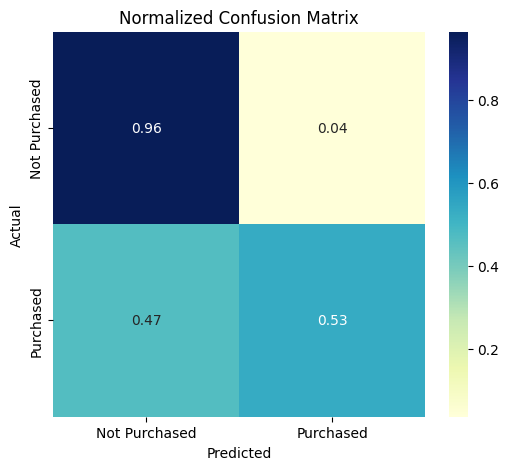

In [7]:
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6,5))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='YlGnBu',
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

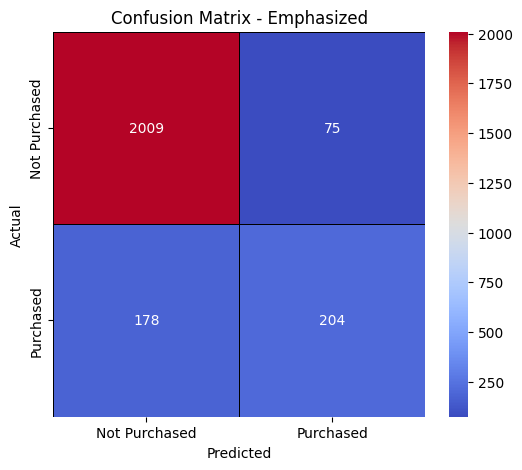

In [8]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            linewidths=0.5, linecolor='black',
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])

plt.title('Confusion Matrix - Emphasized')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# Flatten y_test before passing to pd.Series
actual_dist = pd.Series(np.ravel(y_test)).value_counts()

In [11]:
print(y_test.shape)  # Will likely be (2466, 1)

(2466, 1)


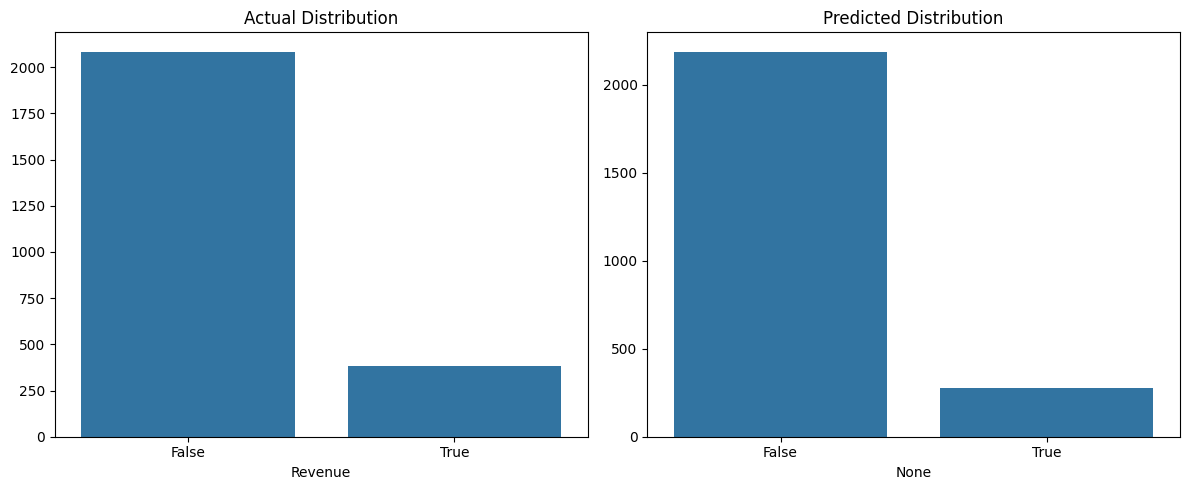

In [12]:
# Distribution of predicted classes
pred_dist = pd.Series(y_pred).value_counts()
actual_dist = pd.Series(y_test.squeeze()).value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x=actual_dist.index, y=actual_dist.values, ax=axs[0])
axs[0].set_title("Actual Distribution")
sns.barplot(x=pred_dist.index, y=pred_dist.values, ax=axs[1])
axs[1].set_title("Predicted Distribution")
plt.tight_layout()
plt.show()

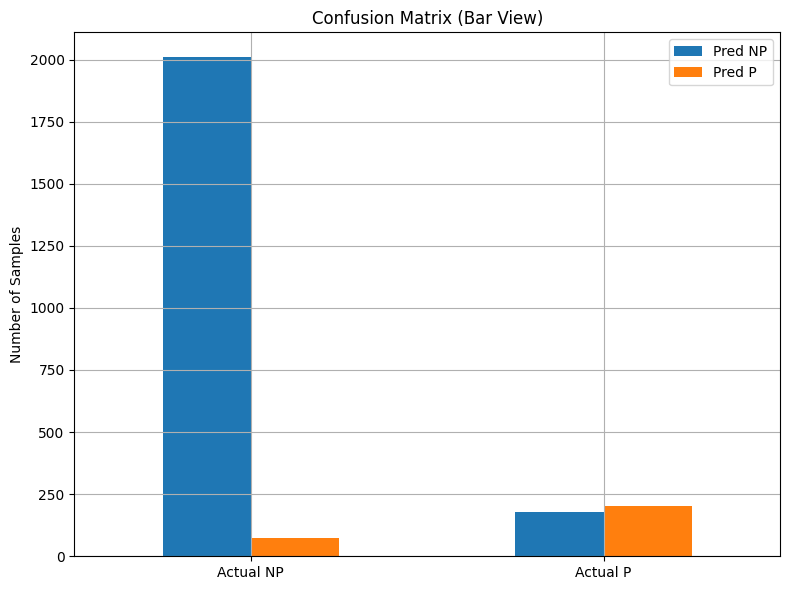

In [13]:
cm_df = pd.DataFrame(cm, index=['Actual NP', 'Actual P'], columns=['Pred NP', 'Pred P'])
cm_df.plot(kind='bar', figsize=(8,6))
plt.title("Confusion Matrix (Bar View)")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

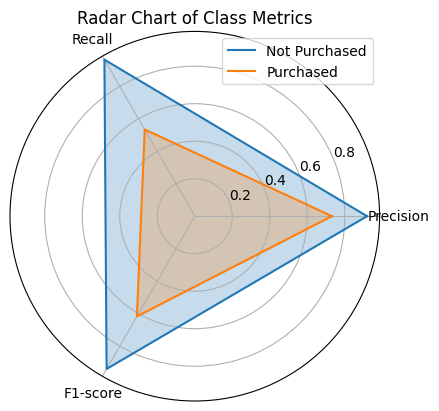

In [14]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

metrics = precision_recall_fscore_support(y_test, y_pred)
labels = ['Precision', 'Recall', 'F1-score']
values_np = metrics[0][0], metrics[1][0], metrics[2][0]
values_p = metrics[0][1], metrics[1][1], metrics[2][1]

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
values_np += values_np[:1]
values_p += values_p[:1]
angles += angles[:1]

fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(angles, values_np, label='Not Purchased')
ax.plot(angles, values_p, label='Purchased')
ax.fill(angles, values_np, alpha=0.25)
ax.fill(angles, values_p, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Radar Chart of Class Metrics")
ax.legend()
plt.show()